In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv('/kaggle/input/processed-cleveland-heart-disease/processed.cleveland.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.describe

<bound method NDFrame.describe of        0    1    2      3      4    5    6      7    8    9    10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    ?  3.0   

     13  
0     0

In [5]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


****Missing Data****

In [6]:
print(df.dtypes)
print(df.columns.isnull().sum())

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object
0


In [7]:
for i in df.select_dtypes('object').columns:
    print(i, df[i].unique())

ca ['0.0' '3.0' '2.0' '1.0' '?']
thal ['6.0' '3.0' '7.0' '?']


In [8]:
 df['thal'].unique()   

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [9]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Since it is only 2% missing data, we drop them

In [10]:
df.replace('?',np.nan,inplace=True)
df.loc[df['ca'].isnull()]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [11]:
df.dropna(subset=['ca','thal'],inplace=True)

In [12]:
print(len(df))
print(df['ca'].unique())
print(df['thal'].unique())

297
['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


In [13]:
df['ca'].astype(float)
df['thal'].astype(float)
print(df['ca'].dtype)
print(df['thal'].dtype)

object
object


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


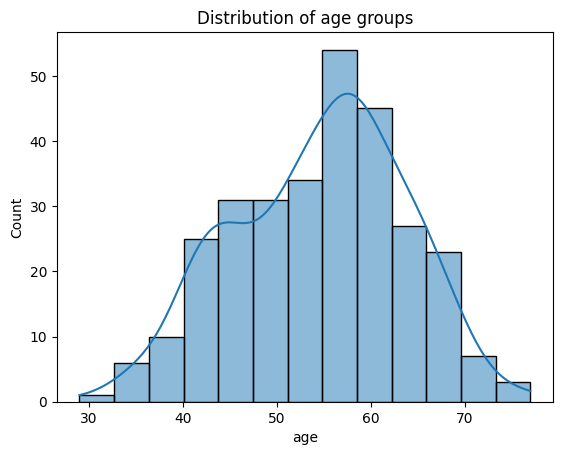

In [14]:
sns.histplot(df['age'],kde=True)
plt.title('Distribution of age groups')
plt.show()

In [15]:
df.groupby('sex')['age'].value_counts().to_frame()

count
sex age        
0.0 62.0      7
    58.0      6
    54.0      5
    60.0      5
    63.0      5
...         ...
1.0 29.0      1
    34.0      1
    37.0      1
    38.0      1
    77.0      1

[73 rows x 1 columns]

In [16]:
x= df.drop('hd',axis=1).copy()
y= df['hd'].copy()
print(x.head())
print(y.head())

    age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  
0    3.0  0.0  6.0  
1    2.0  3.0  3.0  
2    2.0  2.0  7.0  
3    3.0  0.0  3.0  
4    1.0  0.0  3.0  
0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64


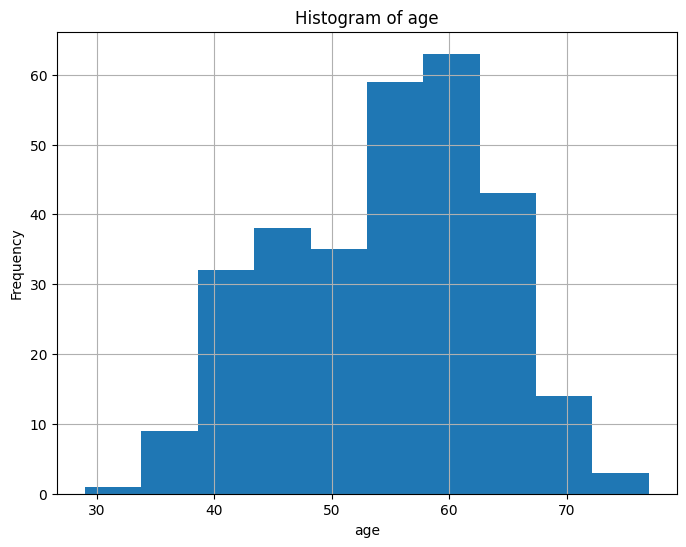

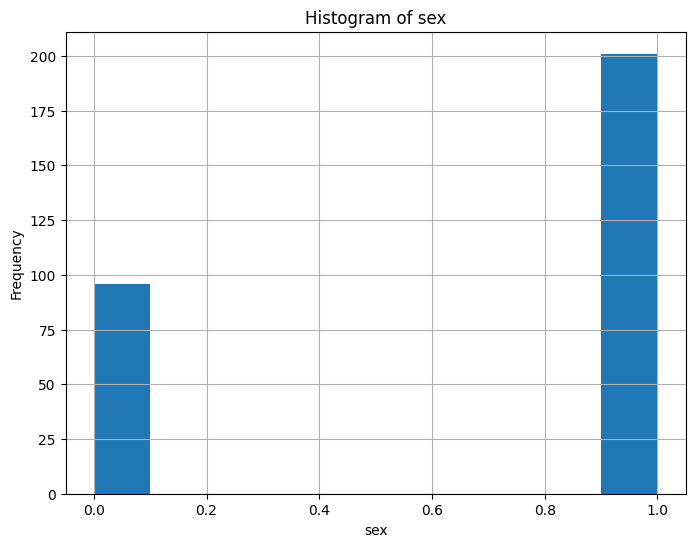

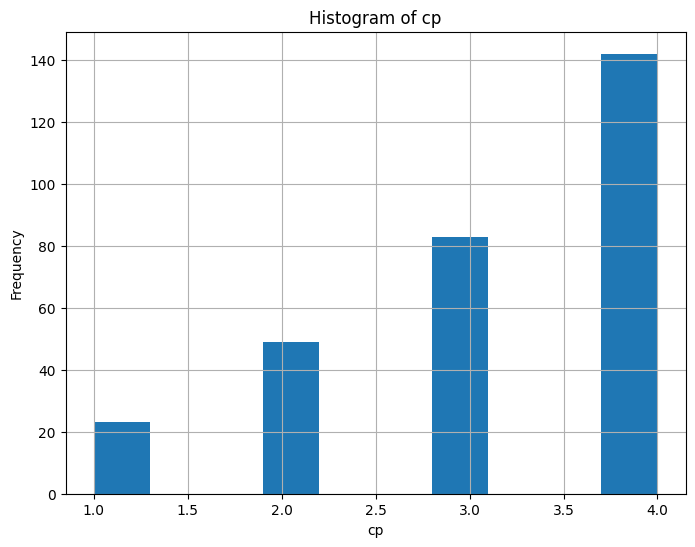

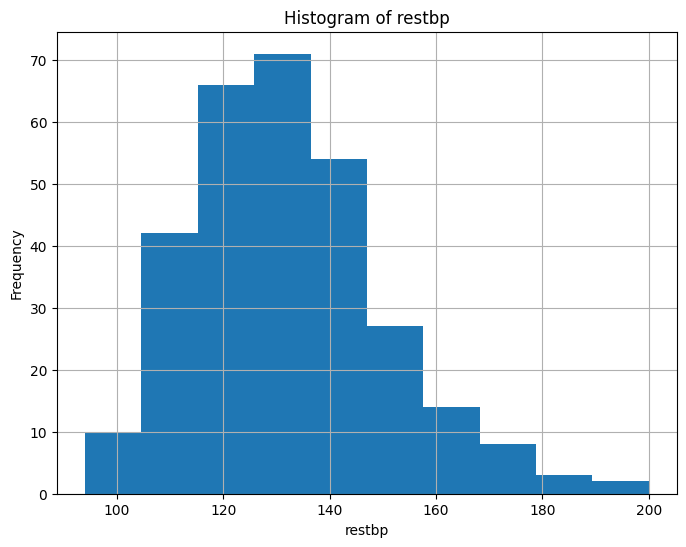

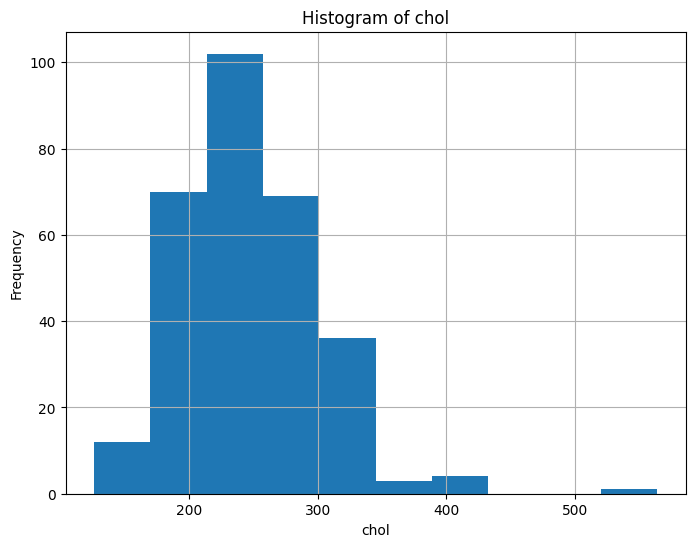

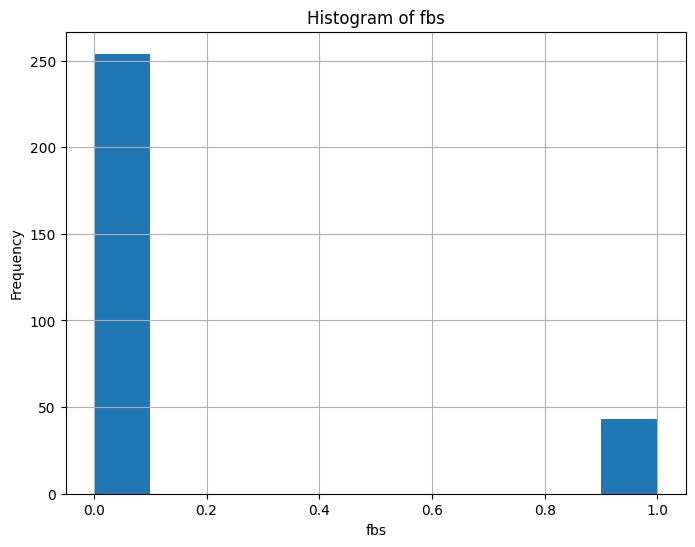

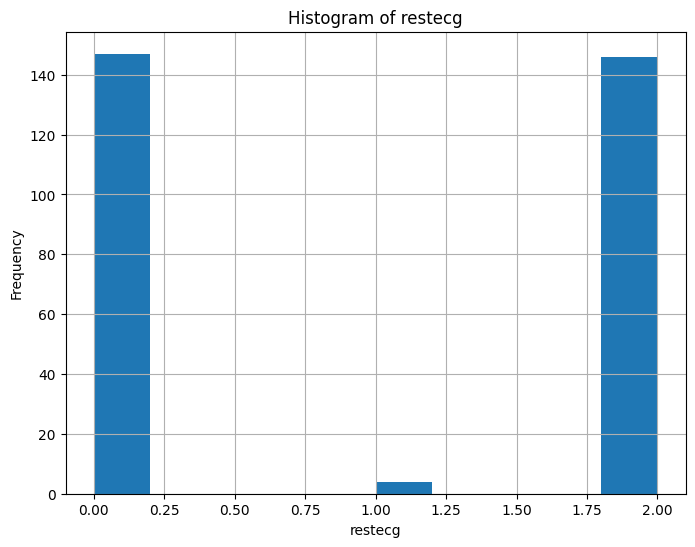

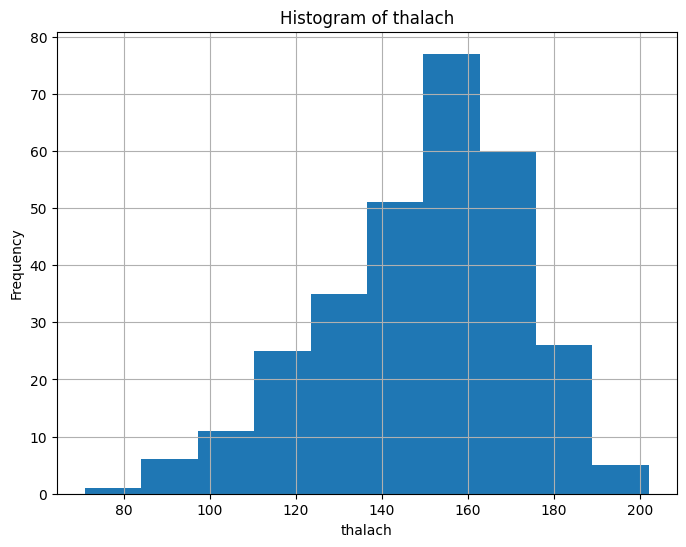

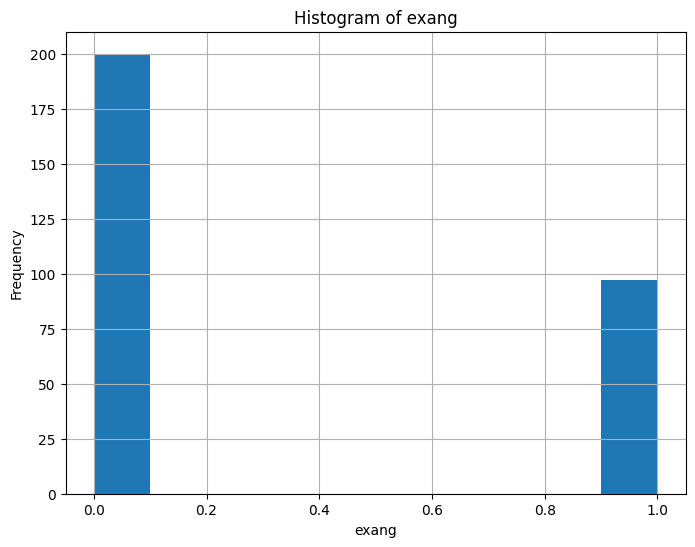

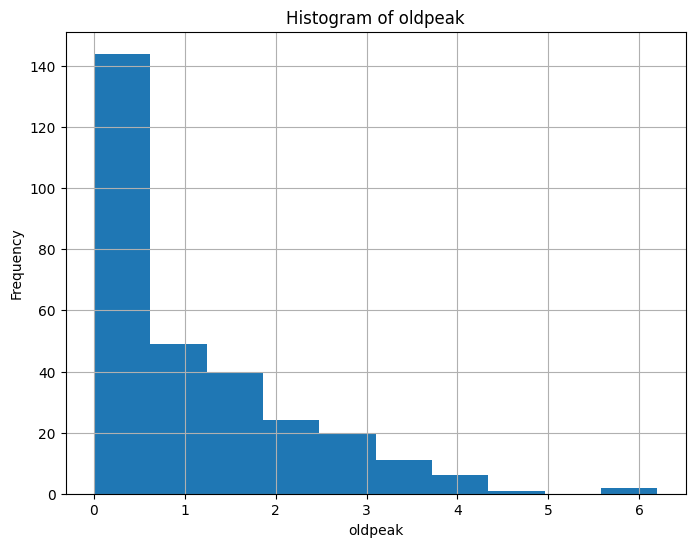

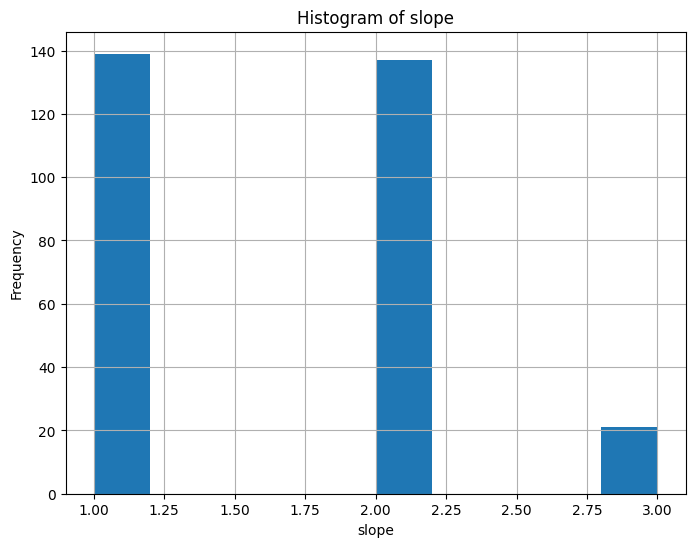

In [17]:
for i in df.select_dtypes('float').columns:
    plt.figure(figsize=(8, 6))
    df[i].hist()
    plt.title('Histogram of ' + i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='cp', ylabel='count'>

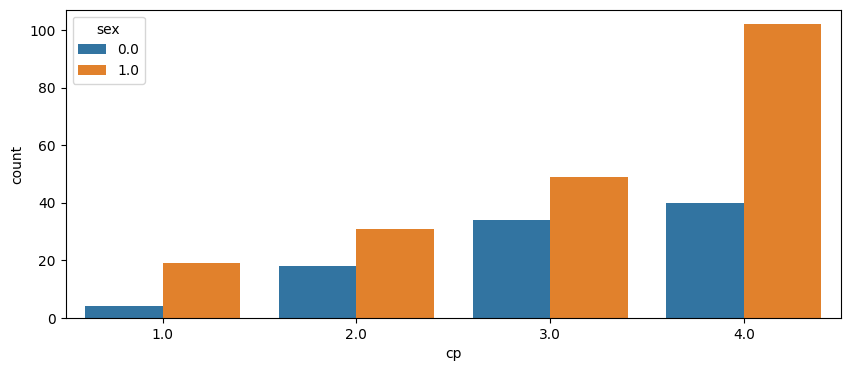

In [18]:
fig = (1,2,1)
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='cp',hue='sex')

In [19]:
x=pd.get_dummies(x,columns=['cp','restecg','slope','thal'])
x.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [20]:
y = y.to_frame()
y.head()

,hd
0,0
1,2
2,1
3,0
4,0


In [21]:
y.loc[y['hd'] > 1] =1
y['hd'].unique()

array([0, 1])

Building the Tree

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=1)
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,Y_train)

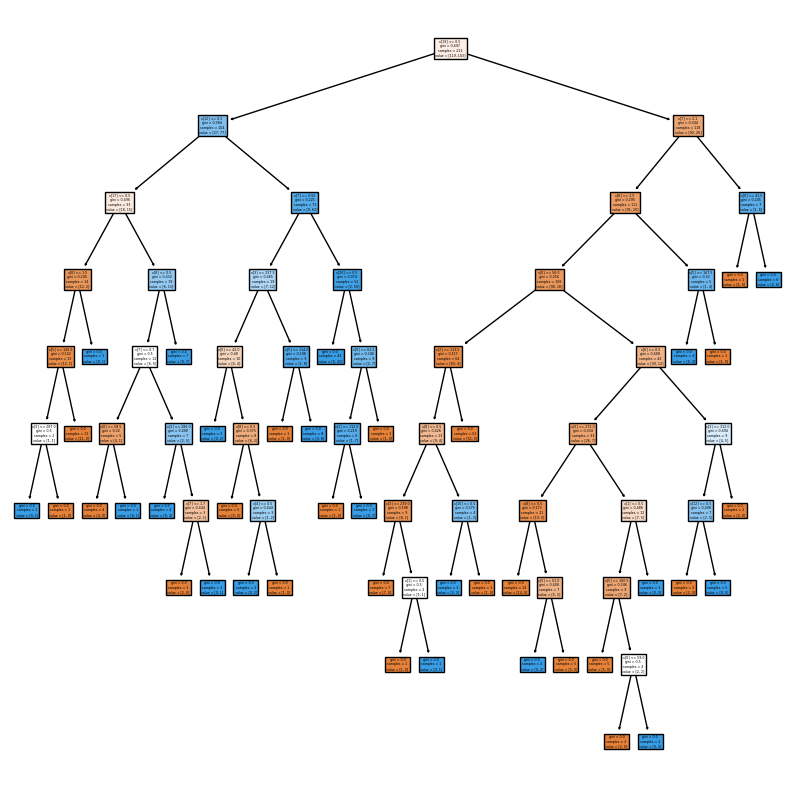

In [23]:
plt.figure(figsize=(10,10))
plot_tree(tree,filled=True)
plt.show()

In [24]:
Y_pred = tree.predict(X_test)

In [25]:
Y_pred=pd.DataFrame(Y_pred)

In [26]:
confusion_matrix(Y_test,Y_pred)

array([[30, 11],
       [ 7, 27]])

Tune the Tree

Find Alpha

In [27]:
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy',accuracy)

Accuracy 0.76


In [28]:
path = tree.cost_complexity_pruning_path(X_train,Y_train)
tree_alpha = path.ccp_alphas
print(tree_alpha)

[0.         0.004004   0.004158   0.00577501 0.00600601 0.00600601
 0.00675676 0.00675676 0.00686401 0.00707851 0.00712801 0.00720721
 0.00772201 0.00800801 0.00800801 0.00810811 0.00815101 0.00938081
 0.00950951 0.00995733 0.01019967 0.01138268 0.01364888 0.01812154
 0.02128171 0.02718601 0.03558028 0.13468595]


In [29]:
ccp_trees=[]
for i in tree_alpha:
    ccp_tree = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    ccp_tree.fit(X_train,Y_train)
    ccp_trees.append(ccp_tree)
print(ccp_trees)

[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.004004004004004004, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0041580041580041565, random_state=0), DecisionTreeClassifier(ccp_alpha=0.005775005775005778, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006756756756756757, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006756756756756757, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006864006864006865, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007078507078507079, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007128007128007135, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007207207207207206, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007722007722007724, random_state=0), DecisionTreeClassifier(ccp_alpha=0.008008008008008006, random_state=0), DecisionTreeClassifier

In [30]:
train_scores = [i.score(X_train,Y_train) for i in ccp_trees]
test_scores = [i.score(X_test,Y_test) for i in ccp_trees]
print(train_scores)
print(test_scores)

[1.0, 0.9954954954954955, 0.990990990990991, 0.9819819819819819, 0.9774774774774775, 0.9774774774774775, 0.963963963963964, 0.963963963963964, 0.9594594594594594, 0.9324324324324325, 0.9279279279279279, 0.9234234234234234, 0.918918918918919, 0.918918918918919, 0.9144144144144144, 0.9054054054054054, 0.8963963963963963, 0.8603603603603603, 0.8513513513513513, 0.8513513513513513, 0.8423423423423423, 0.8423423423423423, 0.8423423423423423, 0.8288288288288288, 0.7972972972972973, 0.7747747747747747, 0.7612612612612613, 0.536036036036036]
[0.7866666666666666, 0.8, 0.8, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8266666666666667, 0.84, 0.8533333333333334, 0.8533333333333334, 0.8533333333333334, 0.8533333333333334, 0.8533333333333334, 0.8533333333333334, 0.84, 0.8266666666666667, 0.8, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.76, 0.76, 0.7733333333333333, 0.5466666666666666]


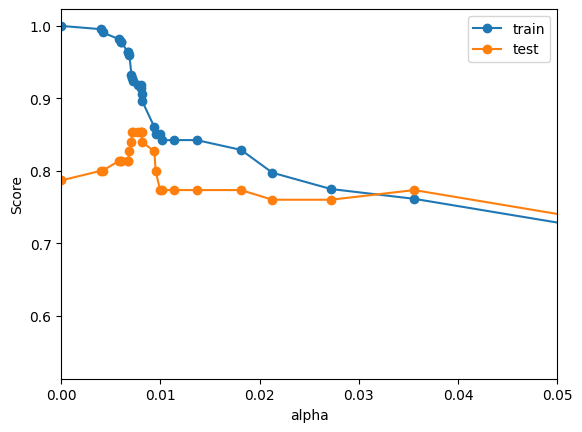

In [31]:
fig, ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('Score')
ax.set_xlim(0,0.05)
ax.plot(tree_alpha,train_scores,marker='o',label="train")
ax.plot(tree_alpha,test_scores,marker='o',label='test')
plt.legend()
plt.show()

We can tell the alpha that maximize the testing score is around 0.09 for this train_test_split. What about other folds?

Cross Validation

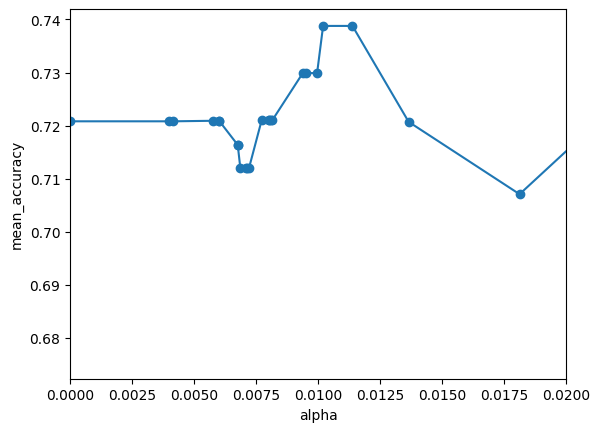

In [32]:
alpha_loop_values = []

for i in tree_alpha:
    dt = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    scores = cross_val_score(dt,X_train,Y_train,cv=5)
    alpha_loop_values.append([i,np.mean(scores),np.std(scores)])

alpha_df = pd.DataFrame(alpha_loop_values, columns = ['alpha','mean_accuracy','std'])

fig, ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('mean_accuracy')
ax.set_xlim(0,0.02)
ax.plot(alpha_df['alpha'],alpha_df['mean_accuracy'],marker='o')

In [33]:
alpha_df.loc[(alpha_df['alpha']>0.01)&(alpha_df['alpha']<0.0125)]

,alpha,mean_accuracy,std
20,0.010200,0.738788,0.055733
21,0.011383,0.738788,0.055733


Overall, 0.0102 is the best alpha

In [34]:
best_alpha = 0.0102
best_alpha

0.0102

Build Tree with best_alpha

In [35]:
tree_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha)
tree_pruned = tree_pruned.fit(X_train,Y_train)
Y_pred_pruned = tree_pruned.predict(X_test)
Y_pred_pruned = pd.DataFrame(Y_pred_pruned)
Y_pred_pruned

,0
0,1
1,1
2,1
3,0
4,0
...,...
70,1
71,0
72,1
73,0


In [36]:
confusion_matrix(Y_test,Y_pred_pruned)

array([[34,  7],
       [10, 24]])

In [37]:
accuracy = accuracy_score(Y_test, Y_pred_pruned)
print('Accuracy',accuracy)

Accuracy 0.7733333333333333


The pruned tree give a better accuracy at test set. so we will use this and replot the tree

[Text(0.5769230769230769, 0.9, 'thal_3.0 <= 0.5\ngini = 0.497\nsamples = 222\nvalue = [119, 103]'),
 Text(0.3076923076923077, 0.7, 'cp_4.0 <= 0.5\ngini = 0.384\nsamples = 104\nvalue = [27, 77]'),
 Text(0.15384615384615385, 0.5, 'slope_2.0 <= 0.5\ngini = 0.496\nsamples = 33\nvalue = [18, 15]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.23076923076923078, 0.3, 'gini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(0.46153846153846156, 0.5, 'oldpeak <= 0.55\ngini = 0.221\nsamples = 71\nvalue = [9, 62]'),
 Text(0.38461538461538464, 0.3, 'gini = 0.465\nsamples = 19\nvalue = [7, 12]'),
 Text(0.5384615384615384, 0.3, 'gini = 0.074\nsamples = 52\nvalue = [2, 50]'),
 Text(0.8461538461538461, 0.7, 'oldpeak <= 2.1\ngini = 0.344\nsamples = 118\nvalue = [92, 26]'),
 Text(0.7692307692307693, 0.5, 'ca <= 2.5\ngini = 0.295\nsamples = 111\nvalue = [91, 20]'),
 Text(0.6923076923076923, 0.3, 'age <= 56.0\ngini = 0.256\nsamples = 106\nvalue = [90, 16]'),
 Text(

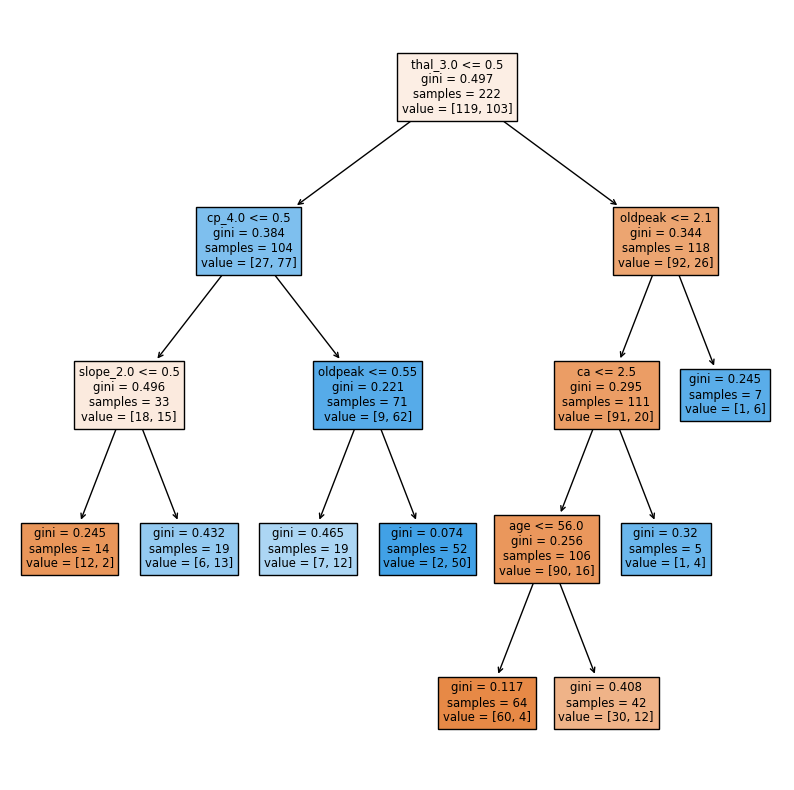

In [38]:
plt.figure(figsize=(10,10))
plot_tree(tree_pruned,filled=True,feature_names=x.columns)